<a href="https://colab.research.google.com/github/Edinaldobjr/aulas_de_python/blob/master/Projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

In [ ]:


class Perceptron():

    def __init__(self,threshold=100, learning_rate=0.01):
        '''
        método de inicialização que tem os seguintes atributos:
        no_of_inputs: número de features passadas como input ao perceptron
        threshold: número de iterações de atualização do peso
        learning_rate: taxa com a qual os pesos são atualizados a cada iteração
        weights: inicialização dos pesos (dica: pode inicializar com método np.zeros). Não se esquecer que o vetor dos pesos
        terá no_of_inputs + 1 elementos por conta do bias que é o primeiro elemento.
        '''
        self.learn_rate = learning_rate
        self.Iterations = threshold
        self.errors = []
        self.weights = np.zeros(1 + x.shape[1])
           
    def predict(self, x):
        '''
      método de implementação da função de ativação.
      inputs: array com o conjunto de inputs (features). No projeto pedimos que considerassem o comprimento e largura da pétala da Iris.
      Não se esquecer que o produto da função de ativação é um produto escalar e pode ser calculado pelo método np.dot
      '''
        return np.where(self.net_input(x) >= 0.0, 1, -1)
      
      

    def train(self, x, y):
        '''
      método de treino. É aqui que os pesos são atualizados um certo número de vezes (determinado pelo valor do threshold).
      Nesse método é feita a comparação entre o resultado da função de ativação (predição) e
      o resultado esperado (label).
      O método deve atualizar tanto os pesos quanto o bias (lembre que o bias é o primeiro valor do vetor peso e tem input 1.)
      A atualização é feita iterativamente um número (threshold) de vezes.
      '''
        self.weights = np.zeros(1 + x.shape[1])
        for i in range(self.Iterations):
            error = 0
            for xi, target in zip(x, y):
                update = self.learn_rate*(target - self.predict(xi))
                self.weights[1:] += update*xi
                self.weights[0] += update
                error += int(update != 0)
            self.errors.append(error)
        return self
       
    # Net Input method for summing the given matrix inputs and their corresponding weights.
    def net_input(self, x):
        return np.dot(x, self.weights[1:]) + self.weights[0]
    
# Data retrieval and preperation.
y = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
x = y.iloc[0:100, [0, 2]].values
y = y.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)




perceptron = Perceptron(threshold=100, learning_rate=0.01)
x = iris.data[:, (2,3)]             # inputs
y = (iris.target == 0).astype(int)  # label = iris setosa. Retorna uma lista com os labels da Iris-Setosa. 0: não, 1: sim
#print(y)

treino = perceptron.train(X,y)
pred = perceptron.predict([4, 0.5])
print(pred)
        
      

1


In [ ]:



url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# download and convert the csv into a DataFrame
df = pd.read_csv(url)
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


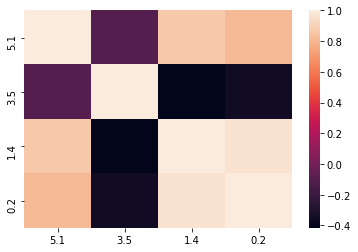

In [ ]:
sns.heatmap(df.corr())

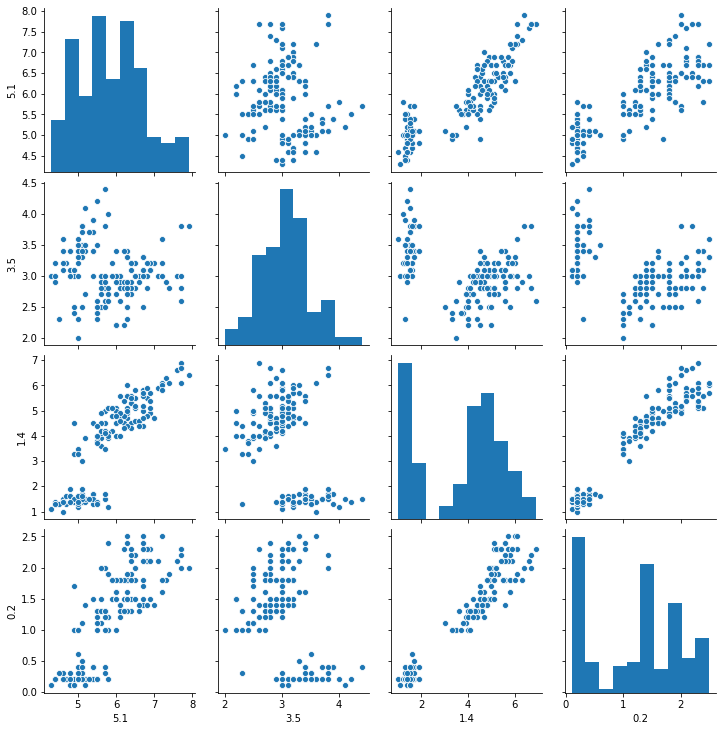

In [ ]:
sns.pairplot(df)

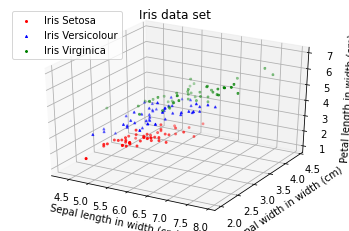

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


# extract the label column
y = df.iloc[:, 4].values
# extract features
x = df.iloc[:, 0:3].values

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_title('Iris data set')
ax.set_xlabel("Sepal length in width (cm)")
ax.set_ylabel("Sepal width in width (cm)")
ax.set_zlabel("Petal length in width (cm)")

# plot the samples
ax.scatter(x[:50, 0], x[:50, 1], x[:50, 2], color='red', 
           marker='o', s=4, edgecolor='red', label="Iris Setosa")
ax.scatter(x[50:100, 0], x[50:100, 1], x[50:100, 2], color='blue', 
           marker='^', s=4, edgecolor='blue', label="Iris Versicolour")
ax.scatter(x[100:150, 0], x[100:150, 1], x[100:150, 2], color='green', 
           marker='x', s=4, edgecolor='green', label="Iris Virginica")

plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris() # returns a dictionary-like object
# características (features) das flores Iris:
print(iris.target_names)    # target = label
print(iris.feature_names)

# Pelo primeiro print acima, as features são: 0: sepal length, 1: sepal width, 2: petal length, 3: petal width
# Vamos selecionar somente as features petal length e petal width:
X = iris.data[:, (2,3)]  # nos retorna um array com 150 conjuntos de inputs
#len(iris.data[:,(2,3)])
y = (iris.target == 0).astype(int)  # label = iris setosa. Retorna uma lista com os labels da Iris-Setosa. 0: não, 1: sim

perceptron_clf = Perceptron()      # dois inputs: comprimento e largura da pétala
perceptron_clf.fit(X,y)            # Train

y_pred = perceptron_clf.predict([[1,0.5]])  # predict
print(y_pred)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[1]


In [ ]:
# Importing dependencies.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

# Creation of the main perceptron object.
#class Perceptron(object):
    #Initiating the learning rate and number of iterations.
    def __init__(self, Learn_Rate=0.5, Iterations=10):
        self.learn_rate = Learn_Rate
        self.Iterations = Iterations
        self.errors = []
        self.weights = np.zeros(1 + x.shape[1])
    
    # Defining fit method for model training.
    def fit(self, x, y):
        self.weights = np.zeros(1 + x.shape[1])
        for i in range(self.Iterations):
            error = 0
            for xi, target in zip(x, y):
                update = self.learn_rate * (target - self.predict(xi))
                self.weights[1:] += update*xi
                self.weights[0] += update
                error += int(update != 0)
            self.errors.append(error)
        return self
    
    # Net Input method for summing the given matrix inputs and their corresponding weights.
    def net_input(self, x):
        return np.dot(x, self.weights[1:]) + self.weights[0]
    
    # Predict method for predicting the classification of data inputs.
    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)

# Data retrieval and preperation.
y = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
x = y.iloc[0:100, [0, 2]].values
plt.scatter(x[:50, 0], x[:50, 1], color='red')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue')
plt.scatter(x[100:150, 0], x[100:150, 1], color='yellow')
plt.show()
y = y.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Model training and evaluation.
Classifier = Perceptron(Learn_Rate=0.01, Iterations=50)
Classifier.fit(x, y)
plt.plot(range(1, len(Classifier.errors) + 1), Classifier.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()



# Defining function that plots the decision regions.
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

# Showing the final results of the perceptron model.
plot_decision_regions(x, y, classifier=Classifier)
plt.show()

C:\Users\Pichau\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass penalty=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


ValueError: Penalty 2 is not supported. 